<a href="https://colab.research.google.com/github/Adyypower/Machine-Learning-/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [4]:
path= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
my_data = pd.read_csv(path)
my_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [5]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
label_encoder = LabelEncoder()
for columns in my_data.columns:
  if columns =='Drug':
    continue
  else:
    my_data[columns] = label_encoder.fit_transform(my_data[columns])
print(my_data)

     Age  Sex  BP  Cholesterol  Na_to_K   Drug
0      8    0   0            0      167  drugY
1     30    1   1            0       89  drugC
2     30    1   1            0       43  drugC
3     12    0   2            0       10  drugX
4     44    0   1            0      133  drugY
..   ...  ...  ..          ...      ...    ...
195   39    0   1            0       69  drugC
196    1    1   1            0       75  drugC
197   35    1   2            0       36  drugX
198    8    1   2            1      102  drugX
199   24    0   1            1       66  drugX

[200 rows x 6 columns]


In [7]:
my_data.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [8]:
custom_map = {'drugA':0,'drugB':1,'drugC':2,'drugX':3,'drugY':4}
my_data['Drug_num'] = my_data['Drug'].map(custom_map)
my_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_num
0,8,0,0,0,167,drugY,4
1,30,1,1,0,89,drugC,2
2,30,1,1,0,43,drugC,2
3,12,0,2,0,10,drugX,3
4,44,0,1,0,133,drugY,4
...,...,...,...,...,...,...,...
195,39,0,1,0,69,drugC,2
196,1,1,1,0,75,drugC,2
197,35,1,2,0,36,drugX,3
198,8,1,2,1,102,drugX,3


In [9]:
my_data.drop('Drug',axis = 1).corr()['Drug_num']

,Drug_num
Age,-0.003323
Sex,-0.098573
BP,0.372868
Cholesterol,0.055629
Na_to_K,0.624663
Drug_num,1.000000


In [10]:
category_counts = my_data['Drug'].value_counts()
category_counts

,count
Drug,
drugY,91
drugX,54
drugA,23
drugC,16
drugB,16


In [11]:
category_counts.index

Index(['drugY', 'drugX', 'drugA', 'drugC', 'drugB'], dtype='object', name='Drug')

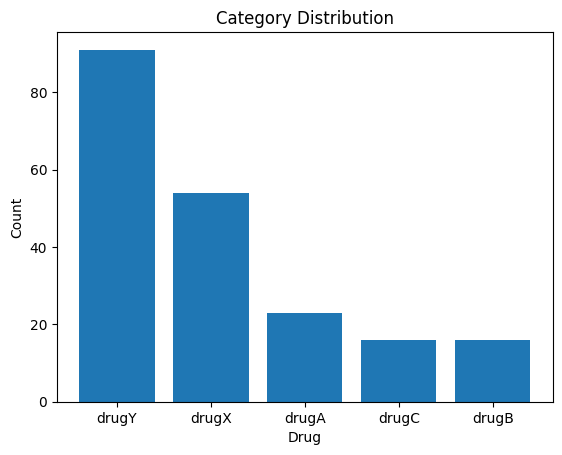

In [12]:
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Drug')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.show()

In [13]:
y = my_data['Drug_num']
x = my_data.drop(['Drug','Drug_num'],axis = 1)

In [14]:
x_trainset,x_testset,y_trainset,y_testset = train_test_split(x,y,test_size = 0.3,random_state = 32)

In [15]:
drugTree = DecisionTreeClassifier(criterion = 'entropy',max_depth = 4)

In [16]:
drugTree.fit(x_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [17]:
tree_prediction = drugTree.predict(x_testset)

In [18]:
print('Decision trees accuracy:', metrics.accuracy_score(y_testset,tree_prediction))

Decision trees accuracy: 1.0


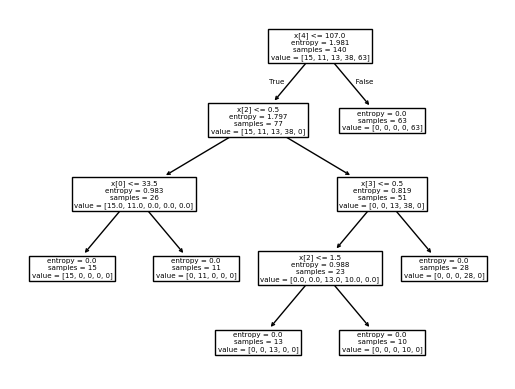

In [19]:
plot_tree(drugTree)
plt.show()

In [21]:
drugTree = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
drugTree.fit(x_trainset,y_trainset)
tree_prediction = drugTree.predict(x_testset)
print('Decision trees accuracy:', metrics.accuracy_score(y_testset,tree_prediction))

Decision trees accuracy: 0.8333333333333334
